# 1: Obtaining the Data

In [1]:
#For this project we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
sns.set()
%matplotlib inline

In [2]:
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' ' "
df=pd.read_csv('webmd.csv', na_values=' ')

In [3]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


# 2: Scrubbing the Data


In [4]:
df.shape

(362806, 12)

In [5]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered.
df=df.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)
#Renaming the columns
df= df.rename(columns={"Satisfaction": "Rating"})

In [7]:
df.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
0,75 or over,Stuffy Nose,25dph-7.5peh,5,5,5,Male
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female
2,65-74,Other,warfarin (bulk) 100 % powder,2,3,3,Female
3,75 or over,Other,warfarin (bulk) 100 % powder,2,2,1,Female
4,35-44,Other,warfarin (bulk) 100 % powder,1,1,1,Male


# 3: EAD

Let's go through each attributes 

In [8]:
#Let's check the statical description of each attributes. The count of some attributes are diffent, which indicates that there 
#are null values in some attributes. But let's deal with the null values later
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,350604,362763,362806,362806.000000,362806.000000,362806.000000,336269
unique,11,1805,7093,NaN,NaN,NaN,2
top,45-54,Other,cymbalta,NaN,NaN,NaN,Female
freq,80043,49765,4648,NaN,NaN,NaN,238226
mean,NaN,NaN,NaN,4.019829,3.532061,3.135408,NaN
std,NaN,NaN,NaN,1.317711,1.455961,1.611106,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [9]:
#calculate the total null vaues in each column and drop all null values:
df.isnull().sum()
df.dropna(inplace=True)

Text(0, 0.5, 'Age frequency')

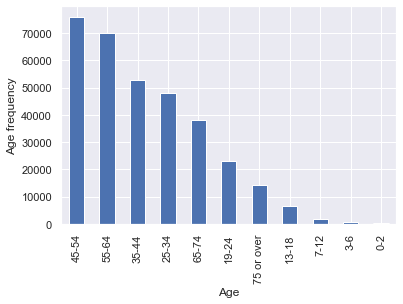

In [10]:
#check the first column 'Age'
df.Age.value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Age frequency')

In [11]:
df.Condition.value_counts()

Other                                                       46926
Pain                                                        23355
High Blood Pressure                                         21365
Depression                                                  13644
Birth Control                                               11029
                                                            ...  
Low Amount of Albumin Proteins in the Blood                     1
Inflammation of the Brain caused by Herpes Simplex Virus        1
Disease due to Bartonella Bacilliformis Bacteria                1
Infection caused by Worms - Metagonimiasis                      1
Lyme Disease of the Central Nervous System                      1
Name: Condition, Length: 1742, dtype: int64

In [12]:
#Looking at the type of condition, 'Other' and 'Pain' are very general, vague and/or not specific, hence I will drop them
df=df[~df.Condition.isin(['Pain','Other'])]
df.Condition.value_counts()

High Blood Pressure                                           21365
Depression                                                    13644
Birth Control                                                 11029
Neuropathic Pain                                               8292
Type 2 Diabetes Mellitus                                       6944
                                                              ...  
Skin Lesion caused by Worms                                       1
Burkitt's Lymphoma                                                1
Chorea Prevention                                                 1
Acute Bone Infection                                              1
Escape of Intravenous Medications into Surrounding Tissues        1
Name: Condition, Length: 1740, dtype: int64

In [13]:
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,261260,261260,261260,261260.000000,261260.000000,261260.000000,261260
unique,11,1740,5356,NaN,NaN,NaN,2
top,45-54,High Blood Pressure,cymbalta,NaN,NaN,NaN,Female
freq,58468,21365,3909,NaN,NaN,NaN,186484
mean,NaN,NaN,NaN,4.050815,3.560836,3.134334,NaN
std,NaN,NaN,NaN,1.295197,1.444561,1.610095,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [14]:
#The maximum value of EaseofUse, Effectiveness and Rating suppsed to be 5, but in the statistical description it was 10 in 
#the first description and then became 6 in the above description.
df[df['EaseofUse']==6]

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
195073,35-44,Migraine Prevention,"topamax capsule, sprinkle",6,6,6,Female
195282,35-44,Migraine Prevention,topamax,6,6,6,Female


In [15]:
df[df['Effectiveness']==6]

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
195073,35-44,Migraine Prevention,"topamax capsule, sprinkle",6,6,6,Female
195282,35-44,Migraine Prevention,topamax,6,6,6,Female


In [16]:
df[df['Rating']==6]

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
195073,35-44,Migraine Prevention,"topamax capsule, sprinkle",6,6,6,Female
195282,35-44,Migraine Prevention,topamax,6,6,6,Female


In [17]:
#in all cases the value of EaseofUse, Effectiveness and Rating are 6 for index of 195073 and 195282. 
df.drop(index=[195073,195282], axis=0, inplace=True)

In [18]:
#check one more time. it looks perfect!
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,261258,261258,261258,261258.000000,261258.000000,261258.000000,261258
unique,11,1740,5356,NaN,NaN,NaN,2
top,45-54,High Blood Pressure,cymbalta,NaN,NaN,NaN,Female
freq,58468,21365,3909,NaN,NaN,NaN,186482
mean,NaN,NaN,NaN,4.050800,3.560817,3.134312,NaN
std,NaN,NaN,NaN,1.295191,1.444551,1.610082,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [19]:
#now, the unique values of Condition and Drug are 1740 and 5356 respectively, which is very difficult to model with this number
#hence we choose to ten Condition and Drug.
df.Condition.value_counts().head(15)

High Blood Pressure                                          21365
Depression                                                   13644
Birth Control                                                11029
Neuropathic Pain                                              8292
Type 2 Diabetes Mellitus                                      6944
Chronic Trouble Sleeping                                      6765
Attention Deficit Disorder with Hyperactivity                 6256
Bipolar Depression                                            5509
Migraine Prevention                                           4554
Panic Disorder                                                4537
Major Depressive Disorder                                     3899
Repeated Episodes of Anxiety                                  3877
Overweight                                                    3656
Rheumatoid Arthritis                                          3644
Disorder characterized by Stiff, Tender & Painful Muscles     

In [20]:
df=df[df.Condition.isin(['High Blood Pressure','Depression','Birth Control','Neuropathic Pain','Type 2 Diabetes Mellitus',
                            'Chronic Trouble Sleeping','Attention Deficit Disorder with Hyperactivity','Bipolar Depression',
                         'Migraine Prevention','Panic Disorder'])]

In [21]:
df.Drug.value_counts().head(10)

lisinopril solution           3582
lisinopril                    3582
lexapro                       2264
effexor xr                    2193
zoloft                        1832
trazodone hcl                 1761
celexa                        1463
mirena intrauterine device    1424
topamax                       1286
topamax capsule, sprinkle     1286
Name: Drug, dtype: int64

In [22]:
df=df[df.Drug.isin(['lisinopril','lisinopril solution','lexapro','effexor xr','zoloft','trazodone hcl','celexa',
                       'mirena intrauterine device','topamax capsule, sprinkle','topamax'])]

In [23]:
#after selecting the top 10 Condition and Drug, the 
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,20673,20673,20673,20673.000000,20673.000000,20673.000000,20673
unique,11,9,10,NaN,NaN,NaN,2
top,45-54,High Blood Pressure,lisinopril solution,NaN,NaN,NaN,Female
freq,4727,7132,3582,NaN,NaN,NaN,15666
mean,NaN,NaN,NaN,4.145214,3.622454,3.087699,NaN
std,NaN,NaN,NaN,1.227035,1.382495,1.578597,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


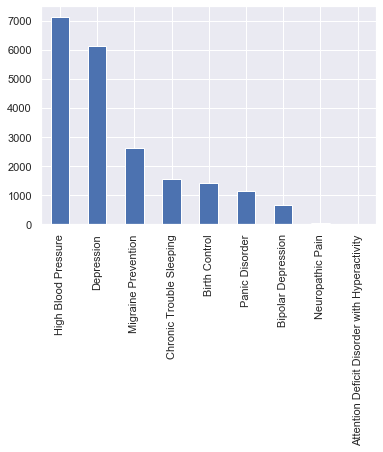

In [24]:
df.Condition.value_counts().plot(kind='bar')

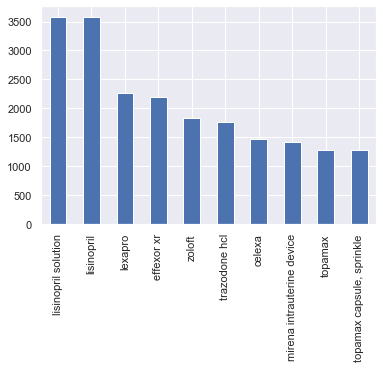

In [25]:
df.Drug.value_counts().plot(kind='bar')

It is always good to start to figure out the relationship between variable before dealing with which variables are more determine the our target variable. a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap. In our case we plot the correlation of variables EaseofUse, Effectiveness and Rating. Looking at the plot it the correlation between Effectiveness and Rating is very strong positive correlation than the variables between EaseofUse and Rating. 

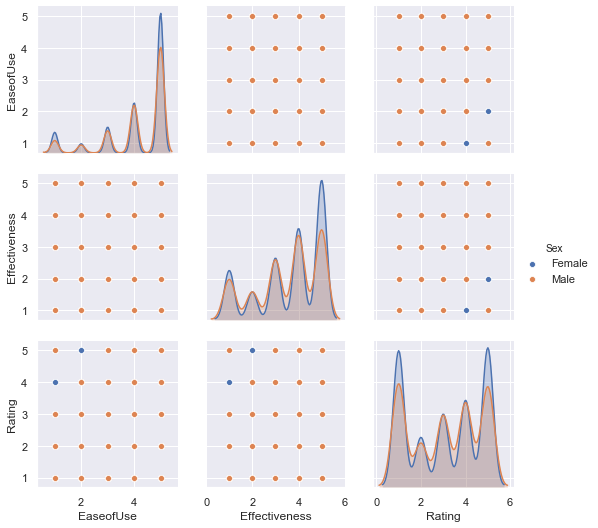

In [26]:
sns.pairplot(df, hue='Sex')

In [27]:
df.corr()

,EaseofUse,Effectiveness,Rating
EaseofUse,1.000000,0.534867,0.536536
Effectiveness,0.534867,1.000000,0.734961
Rating,0.536536,0.734961,1.000000


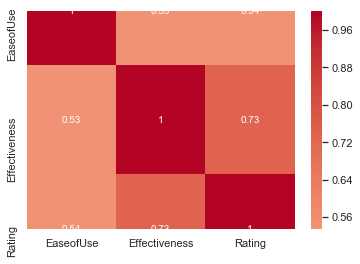

In [28]:
sns.heatmap(df.corr(),annot=True,center = 0, cmap = 'coolwarm')

In [29]:
#Let's replace the age range to average value
df=df.replace(to_replace=['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'],
                                  value=[1,5,10,15,20,30,40,50,60,70,80])

# 4: Modeling the data

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create dummy variables for the 'Condition', 'Drug' and 'Sex' features, since they are categorical 
condition = pd.get_dummies(data=df['Condition'],drop_first=True,prefix='con') #drop first column to avoid dummy trap
drug = pd.get_dummies(data=df['Drug'],drop_first=True,prefix='med')
sex=pd.get_dummies(data=df['Sex'],drop_first=True,prefix='gender')
df.drop(['Condition','Drug', 'Sex'],axis=1,inplace=True)
df = pd.concat([df,condition,drug,sex],axis=1)

In [31]:
df.head()

,Age,EaseofUse,Effectiveness,Rating,con_Bipolar Depression,con_Birth Control,con_Chronic Trouble Sleeping,con_Depression,con_High Blood Pressure,con_Migraine Prevention,...,med_effexor xr,med_lexapro,med_lisinopril,med_lisinopril solution,med_mirena intrauterine device,med_topamax,"med_topamax capsule, sprinkle",med_trazodone hcl,med_zoloft,gender_Male
9203,80,5,4,4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9209,60,4,5,4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9215,70,5,5,5,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9221,60,2,4,2,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9227,60,3,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## 4.1: Using Logical Regression

In [32]:
df.columns

Index(['Age', 'EaseofUse', 'Effectiveness', 'Rating', 'con_Bipolar Depression',
       'con_Birth Control', 'con_Chronic Trouble Sleeping', 'con_Depression',
       'con_High Blood Pressure', 'con_Migraine Prevention',
       'con_Neuropathic Pain', 'con_Panic Disorder', 'med_effexor xr',
       'med_lexapro', 'med_lisinopril', 'med_lisinopril solution',
       'med_mirena intrauterine device', 'med_topamax',
       'med_topamax capsule, sprinkle', 'med_trazodone hcl', 'med_zoloft',
       'gender_Male'],
      dtype='object')

In [33]:
X=df[['Age', 'EaseofUse', 'Effectiveness', 'con_Bipolar Depression',
       'con_Birth Control', 'con_Chronic Trouble Sleeping', 'con_Depression',
       'con_High Blood Pressure', 'con_Migraine Prevention',
       'con_Neuropathic Pain', 'con_Panic Disorder', 'med_effexor xr',
       'med_lexapro', 'med_lisinopril', 'med_lisinopril solution',
       'med_mirena intrauterine device', 'med_topamax',
       'med_topamax capsule, sprinkle', 'med_trazodone hcl', 'med_zoloft',
       'gender_Male']]
y=df['Rating']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [35]:
model=LogisticRegression()

In [41]:
model.fit(X_train, y_train);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [37]:
prediction=model.predict(X_test)

In [40]:
print(classification_report(y_test,prediction));

              precision    recall  f1-score   support

           1       0.58      0.87      0.69      1167
           2       0.00      0.00      0.00       445
           3       0.54      0.07      0.12       628
           4       0.50      0.42      0.46       738
           5       0.64      0.93      0.76      1157

    accuracy                           0.59      4135
   macro avg       0.45      0.46      0.41      4135
weighted avg       0.51      0.59      0.51      4135



In [39]:
print(confusion_matrix(y_test,prediction))

[[1014    0    5   53   95]
 [ 315    0   18   59   53]
 [ 317    0   43  133  135]
 [  95    0    9  310  324]
 [  15    0    4   62 1076]]
